# Data Analysis plots(RNA Sequencing)

In [31]:
# to import required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Stacked Bar Plots

## 1.Alignment Matrix

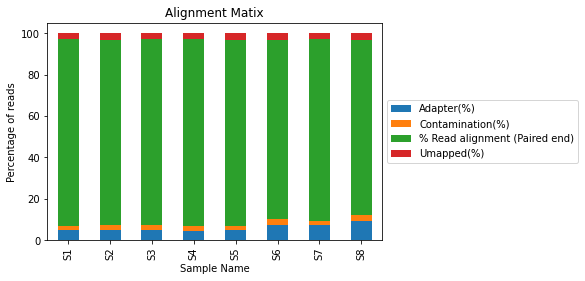

In [6]:
df1= pd.read_excel("stack_bar_plot.xlsx",sep='\t',index_col='Sample Name')
df1['Adapter(%)']= (df1['Total Read (Paired end)']-df1['Adapter removal (Paired End)'])*100/df1['Total Read (Paired end)']
df1['Contamination(%)']=(df1['Adapter removal (Paired End)']-df1['Contamination removal (Paired end)'])*100/df1['Total Read (Paired end)']
df1['% Read alignment (Paired end)'] =df1['Read alignment (Paired end)']*100/df1['Total Read (Paired end)']
df1['Umapped(%)']= 100 - (df1['Adapter(%)']+df1['Contamination(%)']+df1['% Read alignment (Paired end)'])
df1=df1[['Adapter(%)','Contamination(%)','% Read alignment (Paired end)','Umapped(%)']]
ax=df1.plot(kind='bar', stacked=True)
plt.ylabel('Percentage of reads')
plt.title('Alignment Matix')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("alignment_summary_stacked_bar.png", dpi=300, bbox_inches='tight')

## 2. Sequence Aignment Disribution

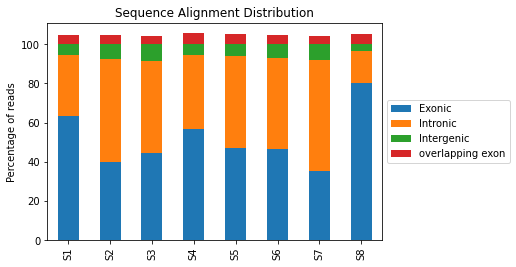

In [12]:
df2=pd.read_excel('Sequence_Alignment_Distribution.xlsx',index_col='Region')
df2=df2.T
ax=df2.plot(kind='bar', stacked=True)
plt.ylabel('Percentage of reads')
plt.title('Sequence Alignment Distribution')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Sequence_alignment.png", dpi=300, bbox_inches='tight')

## 3. Splice Junction Disribution

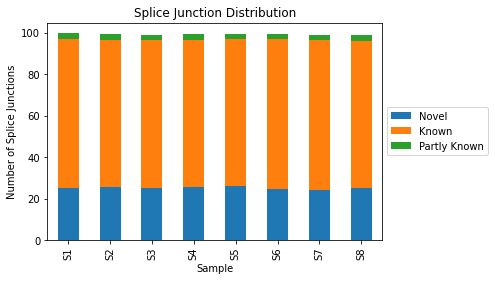

In [17]:
df3=pd.read_excel('Splice_Junction_Distribution.xlsx',index_col='Sample')
ax=df3.plot(kind='bar', stacked=True)
plt.ylabel('Number of Splice Junctions')
plt.title('Splice Junction Distribution')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Splice_Junction.png", dpi=300, bbox_inches='tight')

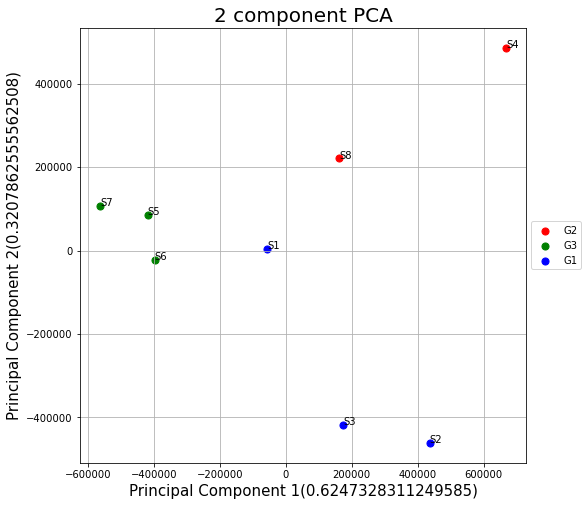

In [26]:
df4=pd.read_excel('PCA.xlsx',index_col='Gene_ID')
df4=df4.T
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df4.drop(['Group'],axis=1))
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf['target']=df4.reset_index()['index']
principalDf['Group']=df4.reset_index()['Group']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1('+str(pca.explained_variance_ratio_[0])+')', fontsize = 15)
ax.set_ylabel('Principal Component 2('+str(pca.explained_variance_ratio_[1])+')', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
types = list(set(principalDf['Group']))
colors = ['r', 'g','b']#,'m','k','c','midnightblue','lime','darkorange','silver','firebrick']
for t, color in zip(types,colors):
    indicesToKeep = principalDf['Group'] == t
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
for i ,txt in enumerate(list(principalDf['target'])):
    ax.annotate(txt,(list(principalDf['principal component 1'])[i],list(principalDf['principal component 2'])[i]))
ax.legend(types,loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid()
fig.savefig("PCA.png", dpi=300, bbox_inches='tight')

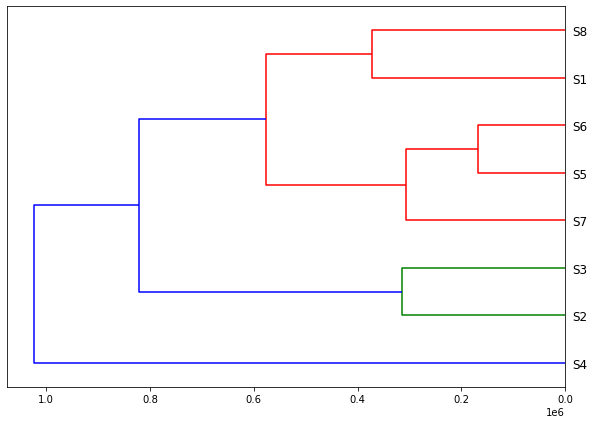

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage 
from matplotlib import pyplot as plt
df5=pd.read_excel('PCA.xlsx',index_col='Gene_ID')
df5=df5.T
df5=df5.drop(['Group'],axis=1)
linked = linkage(df5, 'average')
plt.figure(figsize=(10, 7)) 
dendrogram(linked, labels=df5.index, orientation='left', distance_sort='average', show_leaf_counts=True,)
plt.savefig("dendogram.png", dpi=300, bbox_inches='tight')

In [35]:
from itertools import groupby

C:\Users\ravi.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


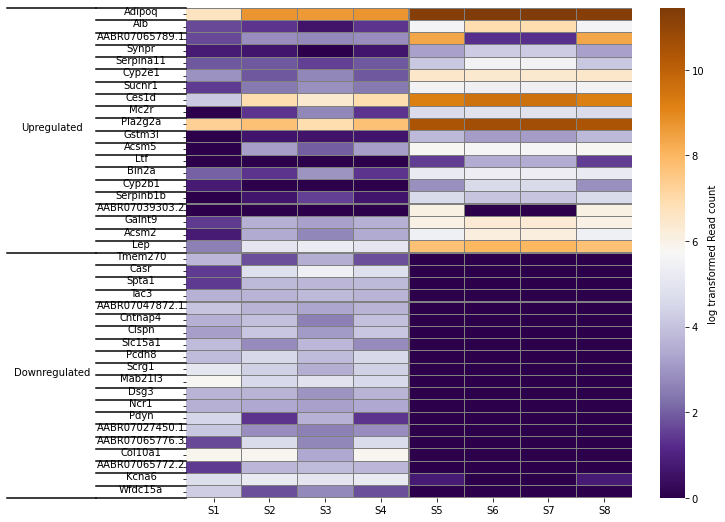

In [32]:
df9=pd.read_excel('Heatmap_Up_Down_genes.xlsx')
df9=df9.set_index([ 'Gene_symbol','Type'])
def add_line(ax, xpos, ypos):
    line = plt.Line2D([ypos, ypos+ .2], [xpos, xpos], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

def label_group_bar_table(ax, df9):
    xpos = -.2
    scale = 1./df9.index.size
    for level in range(df9.index.nlevels):
        pos = df9.index.size
        for label, rpos in label_len(df9.index,level):
            add_line(ax, pos*scale, xpos)
            pos -= rpos
            lypos = (pos + .5 * rpos)*scale
            ax.text(xpos+.1, lypos, label, ha='center', transform=ax.transAxes) 
        add_line(ax, pos*scale , xpos)
        xpos -= .2
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
all_log = np.log(df9)
all1 = all_log.replace([np.inf, -np.inf], np.nan).dropna(how="all")
all1.fillna("0",inplace=True)
all_h = all1[all1.columns].astype(float)
sns.heatmap(all_h,cmap="PuOr_r",cbar_kws={'label': 'log transformed Read count'},linewidths=0.1, linecolor='gray')

#Below 3 lines remove default labels
labels = ['' for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.set_ylabel('')

label_group_bar_table(ax, df9)
fig.subplots_adjust(bottom=.1*df9.index.nlevels)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Clustermap

C:\Users\ravi.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


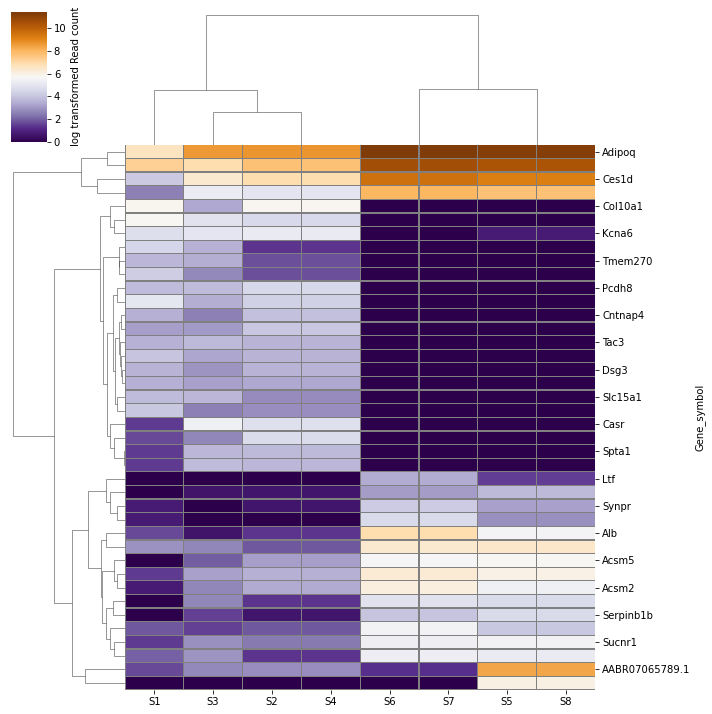

In [33]:
# read data into table
df=pd.read_excel('Heatmap_Up_Down_genes.xlsx',index_col='Gene_symbol')
df=df.drop(['Type'],axis=1)
df.head()
# log transformation of the dataframe
all_log = np.log(df) 
# replacing -infinity and +infinity with NaN, then drop all those rows whose every entries are NaN
all1 = all_log.replace([np.inf, -np.inf], np.nan).dropna(how="all")
# fill all NaN with 0
all1.fillna("0",inplace=True)
# set all the column as float data type
all_h = all1[all1.columns].astype(float)
# the clustermap plot
sns.clustermap(all_h, method="average",cmap="PuOr_r",cbar_kws={'label': 'log transformed Read count'},linewidths=0.2, linecolor='gray')
# to save the plot
plt.savefig('clustermap.png', dpi=150, bbox_inches='tight')

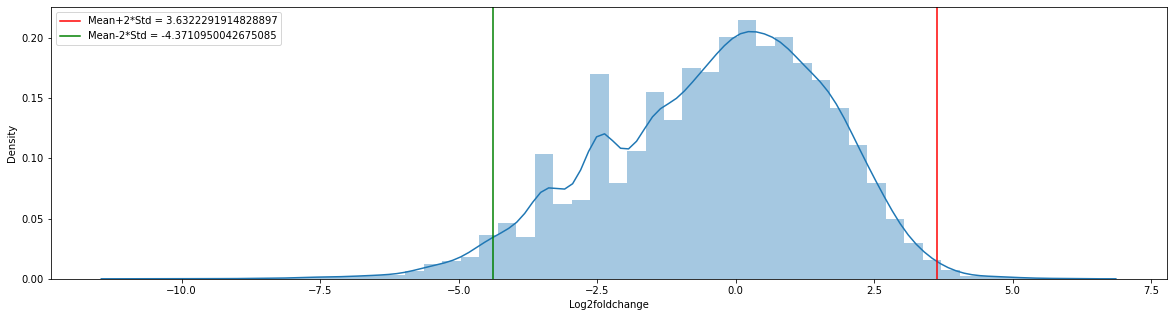

In [34]:
df10=pd.read_excel('log2FC_for_one_vs_one_comparison.xlsx',index_col='Gene name')
plt.figure(figsize=(20,5))
sns.distplot(df10['Log2foldchange'],bins=50)
plt.ylabel('Density')
plt.axvline(np.mean(df10['Log2foldchange'])+2*np.std(df10['Log2foldchange']), label='Mean+2*Std = {}'.format(np.mean(df10['Log2foldchange'])+2*np.std(df10['Log2foldchange'])),c='r')
plt.axvline(np.mean(df10['Log2foldchange'])-2*np.std(df10['Log2foldchange']),label='Mean-2*Std = {}'.format(np.mean(df10['Log2foldchange'])-2*np.std(df10['Log2foldchange'])),c='g')
plt.legend()
plt.savefig('distribution3.png', dpi=300, bbox_inches='tight')